# ECON526: Quantitative Economics with Data Science Applications

Linear and Nonlinear Dynamics

Jesse Perla (University of British Columbia)

# Overview

## Motivation and Materials

-   In this lecture, we will apply some of our tools to non-linear
    equations, which come up in macroeconomics, industrial organization,
    and econometrics
-   The primary example is a simple version of the growth models
-   We will introduce the idea of a fixed point, which has many
    applications across fields of economics
-   A special emphasis will be placed on analyzing stability - which
    connects to the eigenvalues of the dynamical system

## Packages and Other Materials

-   Some additional material and references

    -   [Solow-Swan Model](https://intro.quantecon.org/solow.html)
    -   [Dynamics and Stability in One
        Dimension](https://intro.quantecon.org/scalar_dynam.html)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.linalg import inv, solve, det, eig, lu, eigvals

# Fixed Points

## Fixed Points of a Map

**Fixed Point**

Let $f : S \to S$ where we will assume $S \subseteq \mathbb{R}^N$. Then
a fixed point $x^* \in S$ of $f$ is one where

$$
  x^* = f(x^*)
  $$

Fixed points **may not exist**, or could have **multiplicity**

## Fixed Points for Linear Functions

-   We have already done this for linear functions.
-   Let $f(x) = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix} x$
-   Then we know that $x^* = \begin{bmatrix} 0 & 0 \end{bmatrix}^T$ is a
    fixed point
-   Are there non-trivial others?
    -   Could check eigevectors as we did before,
        $\lambda \times x = A x$
    -   If there is an $(\lambda, x)$ pair with $\lambda = 1$ it is a
        fixed point

In [3]:
A = np.array([[0.8, 0.2], [0.2, 0.8]])
eigvals, eigvecs = eig(A)
print(f"lambda_1={eigvals[0]}, ||x* - A x*||={norm(A @ eigvecs[:,0] - eigvecs[:,0])}")

lambda_1=(1+0j), ||x* - A x*||=1.5700924586837752e-16

## Fixed Points for Nonlinear Functions

-   Consider $f(x) = \sqrt{x}$ and $f(x) = x^2$ for $x \geq 0$
-   Trivially $x^* = 0$ is a fixed point of both, but what about others?
-   Plot the 45-degree line to see if they cross! Seems $x^* = 1$ as
    well?
    -   As we will discuss, though. The shape at $x^*=1$ and $x^*=0$ is
        very different
    -   Think about what happens if we “perturb” slightly away from that
        point?

## Plot Against 45 degree line

-   Consider $f(x) = \sqrt{x}$ and $f(x) = x^2$ for $x \geq 0$

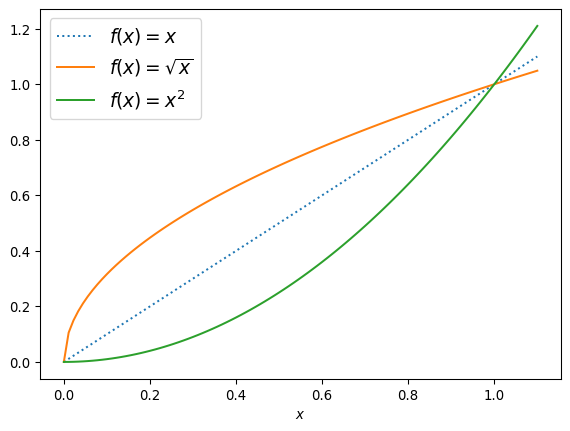

In [4]:
x_grid = np.linspace(0, 1.1, 100)
fig, ax = plt.subplots()
ax.plot(x_grid, x_grid, linestyle=':', label=r"$f(x) = x$")
ax.plot(x_grid, np.sqrt(x_grid), label=r"$f(x) = \sqrt{x}$")
ax.plot(x_grid, x_grid**2, label=r"$f(x) = x^2$")
ax.set_xlabel(r"$x$")
ax.legend(loc='upper left', fontsize=14)
plt.show()

## Interpreting Iterations with the 45 degree line

-   To use these figures:
    1.  Start with any point on the x-axis
    2.  Jump to the $f(\cdot)$ for that point to see where it went
    3.  Go across to the 45 degree line
    4.  Then down to the new value
-   Repeat! Useful to interpret dynamics as well as various numerical
    methods
-   Gives intuition on speed of convergence/etc. as well

See [QuantEcon Scalar
dynamics](https://intro.quantecon.org/scalar_dynam.html) for base code

In [5]:
# From https://intro.quantecon.org/scalar_dynam.html
def subplots():
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax


def plot45(g, xmin, xmax, x0, num_arrows=6, var='x', glabel='g'):

    xgrid = np.linspace(xmin, xmax, 200)

    fig, ax = subplots()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)

    hw = (xmax - xmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw,
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label=glabel)
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    x = x0
    xticks = [xmin]
    xtick_labels = [xmin]

    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(x), **arrow_args) # x, y, dx, dy
        else:
            ax.arrow(x, x, 0.0, g(x) - x, **arrow_args)
            ax.plot((x, x), (0, x), 'k', ls='dotted')

        ax.arrow(x, g(x), g(x) - x, 0, **arrow_args)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i)))

        x = g(x)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i+1)))
        ax.plot((x, x), (0, x), 'k', ls='dotted')

    xticks.append(xmax)
    xtick_labels.append(xmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args, fontsize=14)
    plt.show() 

## Evaluating the $\sqrt{x}$ near $x=0.05 > 0$

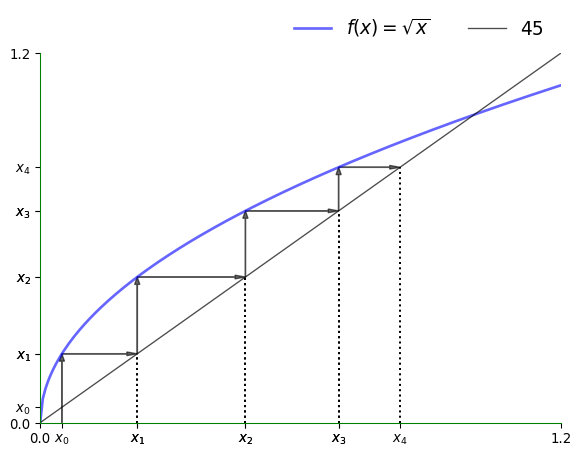

In [6]:
plot45(lambda x: np.sqrt(x), 0.0, 1.2, 0.05, num_arrows=4, var="x", glabel=r"$f(x) = \sqrt{x}$")

## Evaluating the $\sqrt{x}$ near $x=1.1 > 1$

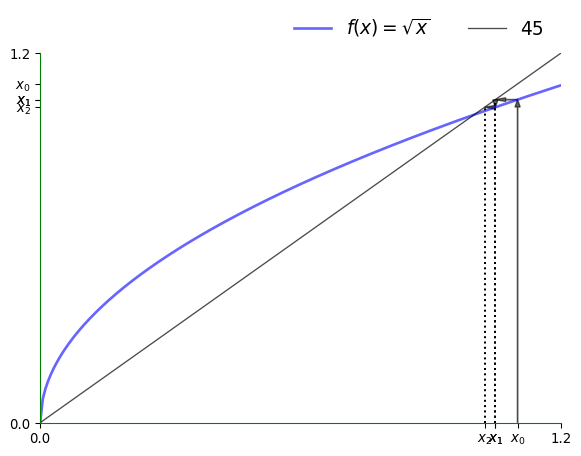

In [7]:
plot45(lambda x: np.sqrt(x), 0.0, 1.2, 1.1, num_arrows=2, var="x", glabel=r"$f(x) = \sqrt{x}$")

## Evaluating the $x^2$ for $x = 0.6 < 1$

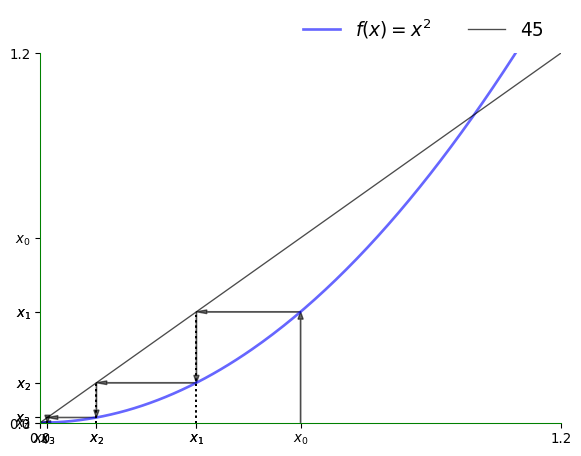

In [8]:
plot45(lambda x: x**2, 0.0, 1.2, 0.6, num_arrows=4, var="x", glabel=r"$f(x) = x^2$")

## Evaluating the $x^2$ for $x = 1.01 > 1$

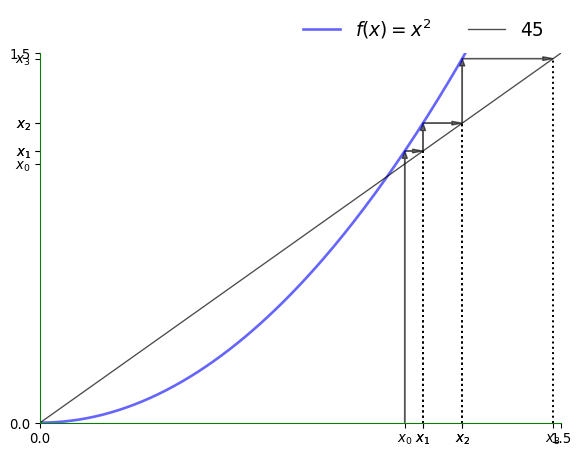

In [9]:
plot45(lambda x: x**2, 0.0, 1.5, 1.05, num_arrows=3, var="x", glabel=r"$f(x) = x^2$")

# Linear Dynamics and Stability

## Scalar Linear Model

$$
x_{t+1} =  a x_t + b \equiv f(x_t),\quad \text{ given }x_0
$$

$$
\begin{aligned}
x_1 &= a x_0 +b\\
x_2 &= a x_1 + b = a^2 x_0 + ab + b\\
\ldots & \\
x_t &= a^t x_0 + b \sum_{i=0}^{t-1} a^i = a^t x_0 + b \frac{1-a^t}{1-a}\\
x^* &\equiv \lim_{t\to\infty}x_t = \begin{cases}\frac{b}{1-a} & \text{ if } |a|<1\\
\text{diverges} & \text{ if } |a|\geq 1\\
\text{indeterminate} & \text{ if } a=1
\end{cases}
\end{aligned}
$$

## Stability and Jacobians

-   Given $f(x_t) = a x_t + b$
    -   The Jacobian (derivative since scalar) $\nabla f(x_t) = a$
-   Eigenvalues of a scalar are just the value itself, so can write the
    condition as
    -   Stable at fixed point $x^*$ if $\rho(\nabla f(x^*)) < 1$, where
        $\rho(A) = \max_i |\lambda_i(A)|$ the spectral radius
    -   Saw this as a condition for stability with higher-dimensional
        linear systems when looking at Present Discounted Values

## Linearization and Stability

-   Important condition for stability with nonlinear $f(\cdot)$
-   Intuition: assume $x^*$ exists and then
    -   Linearize around the steady state and see if it would be locally
        explosive
    -   Necessary but not sufficient.
        $\rho(\nabla f(x^*)) > 1 \implies x^*$ can’t be a stable fixed
        point
-   You may see this when working with macro models in Dynare and
    similar methods in macroeconomics

## Linearization

-   Assume steady state $x^* = f(x^*)$ exists, with system
    $x_{t+1} = f(x_t)$
-   Take [first-order taylor
    expansion](https://en.wikipedia.org/wiki/Linearization#Multivariable_functions)
    around $x^*$

$$
\begin{aligned}
x_{t+1} &= f(x^*) + \nabla f(x^*) (x_t - x^*) + \text{second order and smaller terms}\\
x_{t+1} - x^* &\approx \nabla f(x^*) (x_t - x^*)\\
\hat{x}_{t+1} &\approx \nabla f(x^*) \hat{x}_t
\end{aligned}
$$

-   Where the last formulation is common in macroeconomics and
    time-series econometrics. $\hat{x}_t\equiv x_t - x^*$ is the
    **deviation from the steady state**
    -   For the linear case, these would all be exact as there are no
        higher-order terms

## Quality of Linearization

-   Gives approximate dynamics for a perturbation close to the steady
    state
    -   May have good approximation far away from $x^*$ if $f(\cdot)$ is
        close to linear
    -   May have terrible approximations close to $x^*$ if $f(\cdot)$
        highly nonlinear/asymmetric
    -   Often
        [log-linearization](https://sites.nd.edu/esims/files/2023/05/log_linearization_sp17.pdf)
        is used instead, which expresses in percent deviation

## Plot Against 45 degree line Reminder

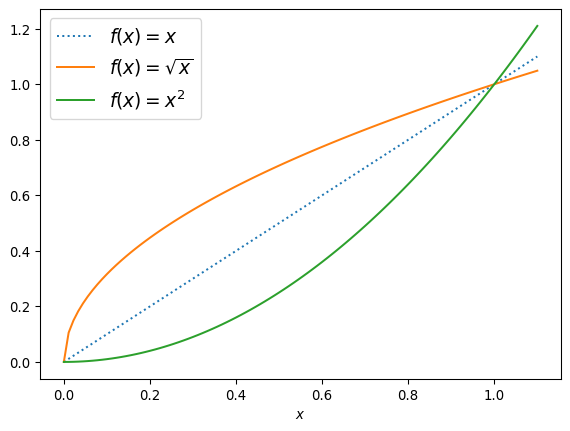

In [10]:
x_grid = np.linspace(0, 1.1, 100)
fig, ax = plt.subplots()
ax.plot(x_grid, x_grid, linestyle=':', label=r"$f(x) = x$")
ax.plot(x_grid, np.sqrt(x_grid), label=r"$f(x) = \sqrt{x}$")
ax.plot(x_grid, x_grid**2, label=r"$f(x) = x^2$")
ax.set_xlabel(r"$x$")
ax.legend(loc='upper left', fontsize=14)
plt.show()

## Stability of $\sqrt{x}$ and $x^2$

-   Recall that both had fixed points at $x^*=0$ and $x^*=1$

-   Lets check derivatives! Let $f_1(x) = \sqrt{x}$ and $f_2(x) = x^2$

    -   $\nabla f_1{x} = \frac{1}{2\sqrt{x}}$ and $\nabla f_2(x) = 2x$

-   Check spectral radius of the Jacobians (trivial since univariate) at
    the fixed points:

    -   At $x^* = 0$, $\nabla f_1(0) = \infty$ and $\nabla f_2(0) = 0$
    -   At $x^* = 1$, find $\nabla f_1(1) = \frac{1}{2}$ and
        $\nabla f_2(1) = 2$

-   Interpretation:

    -   $f_1(x)$ is locally explosive at $x^*=0$ and locally stable at
        $x^*=1$
    -   $f_2(x)$ is locally stable at $x^*=0$ and locally explosive at
        $x^*=1$

# Solow-Swan Growth Model

## Model of Growth and Capital

-   An early growth model of economic growth is the [Solow-Swan
    model](https://intro.quantecon.org/solow.html#the-model)
-   Simple model. Details of the derivation for self-study/macro
    classes:
    -   $k_t$ by capital per worker and $y_t$ is total output per worker
    -   $\alpha \in (0,1)$ be a parameter which governs the marginal
        product of capital
    -   $\delta \in (0,1)$ is the depreciation rate (i.e., fraction of
        machines breaking each year)
    -   $A > 0$ is a parameter which governs the total factor
        productivity (TFP)
    -   $s \in (0,1)$ is the fraction of output used for investment and
        savings

## Capital Dynamics

Then capital dynamics follow a nonlinear difference equation with steady
state

$$
\begin{aligned}
y_t &= A k_t^{\alpha}\\
k_{t+1} &= s y_t + (1-\delta)k_t = s A k_t^{\alpha} + (1-\delta) k_t \equiv g(k_t)\quad \text{ given }k_0\\
k^* &\equiv \left(\frac{s A}{\delta}\right)^{\frac{1}{1-\alpha}}
\end{aligned}
$$

## Implementing the Solow-Swan Model

In [11]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
def y(k):
    return A*k**alpha
# "closure" binds y, A, s, alpha, delta    
def g(k):
    return s*y(k) + (1-delta)*k

k_star = (s*A/delta)**(1/(1-alpha))
k_0 = 0.25
print(f"k_1 = g(k_0) = {g(k_0):.3f},\
k_2 = g(g(k_0)) = {g(g(k_0)):.3f}")
print(f"k_star = {k_star:.3f}")

k_1 = g(k_0) = 0.546,k_2 = g(g(k_0)) = 0.828
k_star = 1.785

## Plotting $k_t$ vs. $k_{t+1}$ verifies our $k^*$

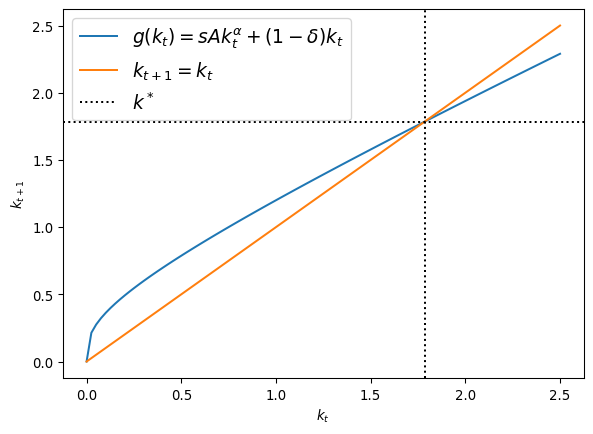

In [12]:
k_grid = np.linspace(0, 2.5, 100)
fig, ax = plt.subplots()
ax.plot(k_grid, g(k_grid), label=r"$g(k_t) = s A k_t^{\alpha} + (1-\delta)k_t $")
ax.plot(k_grid, k_grid, label=r"$k_{t+1}=k_t$")
ax.axvline(x=k_star, linestyle=':', color='black', label=r'$k^*$')
ax.axhline(y=k_star, linestyle=':', color='black')
ax.set_xlabel(r"$k_t$")
ax.set_ylabel(r"$k_{t+1}$")
ax.legend(loc='upper left', fontsize=14)
plt.show()

## Jacobian of $g$ at the steady state

$$
\begin{aligned}
\nabla g(k^*) &=  \alpha s A k^{*\alpha-1} + 1-\delta,\quad \text{ substitute for } k^*\\
&= \alpha s A \frac{\delta}{s A} + 1-\delta = \alpha \delta + 1 - \delta\\
&= 1 - (1-\alpha)\delta < 1
\end{aligned}
$$

-   Key requirements were $\alpha \in (0,1)$ and $\delta \in (0,1)$
-   The spectral radius of a scalar is just that value itself.
-   The spectral radius of $||\nabla g(k^*)|| < 1$, a necessary
    condition for $k^*$ stable
-   **Aside:** macroeconomics, industrial organization, etc. this is
    related to contraction mappings and Blackwell’s condition

## Simulation

In [13]:
# Generic function, takes in a function!
def simulate(f, X_0, T):
    X = np.zeros((1, T+1))
    X[:,0] = X_0
    for t in range(T):
        X[:,t+1] = f(X[:,t])
    return X
T = 10
X_0 = np.array([0.25]) # initial condition
X = simulate(g, X_0, T) # use with our g
print(f"X_{T} = {X[:,T]}")

X_10 = [1.70531835]

## Capital Transition from $k_0 < k^*$ and $k_0 > k^*$

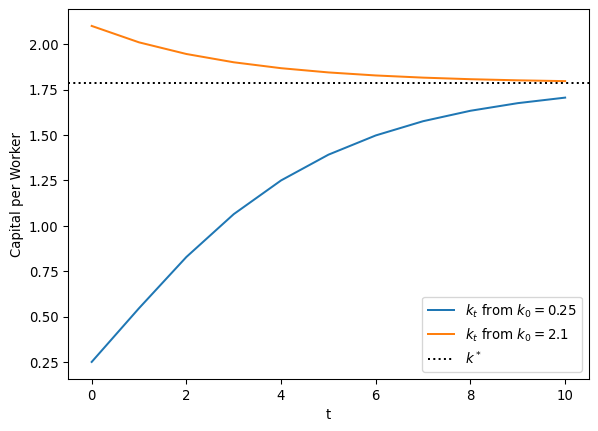

In [14]:
X_1 = simulate(g, X_0, T) # use with our g
X_2 = simulate(g, np.array([2.1]) , T)
fig, ax = plt.subplots()
ax.plot(range(T+1), X_1.T,
  label=r"$k_t$ from $k_0 = 0.25$")
ax.plot(range(T+1), X_2.T,
  label=r"$k_t$ from $k_0 = 2.1$")
ax.set(xlabel="t", ylabel="Capital per Worker")
ax.axhline(y=k_star, linestyle=':',
  color='black',label=r"$k^*$")
ax.legend()
plt.show()

## Trajectories Using the 45 degree Line

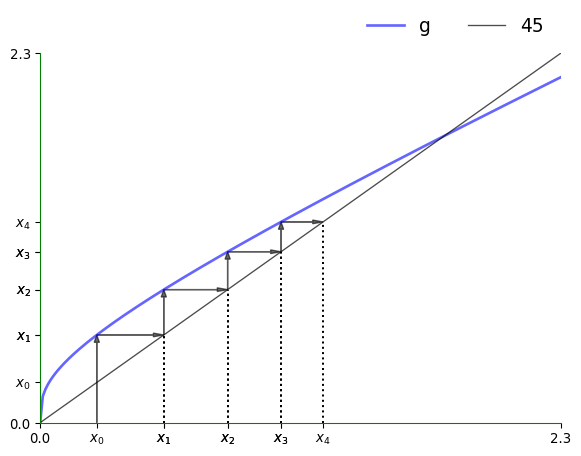

In [15]:
# From https://intro.quantecon.org/scalar_dynam.html
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax


def plot45(g, xmin, xmax, x0, num_arrows=6, var='x'):

    xgrid = np.linspace(xmin, xmax, 200)

    fig, ax = subplots()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)

    hw = (xmax - xmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw,
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label='g')
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    x = x0
    xticks = [xmin]
    xtick_labels = [xmin]

    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(x), **arrow_args) # x, y, dx, dy
        else:
            ax.arrow(x, x, 0.0, g(x) - x, **arrow_args)
            ax.plot((x, x), (0, x), 'k', ls='dotted')

        ax.arrow(x, g(x), g(x) - x, 0, **arrow_args)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i)))

        x = g(x)
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i+1)))
        ax.plot((x, x), (0, x), 'k', ls='dotted')

    xticks.append(xmax)
    xtick_labels.append(xmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args, fontsize=14)
    plt.show()

def ts_plot(g, xmin, xmax, x0, ts_length=6, var='x'):
    fig, ax = subplots()
    ax.set_ylim(xmin, xmax)
    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'${}_t$'.format(var), fontsize=14)
    x = np.empty(ts_length)
    x[0] = x0
    for t in range(ts_length-1):
        x[t+1] = g(x[t])
    ax.plot(range(ts_length),
            x,
            'bo-',
            alpha=0.6,
            lw=2,
            label=r'${}_t$'.format(var))
    ax.legend(loc='best', fontsize=14)
    ax.set_xticks(range(ts_length))
    plt.show()

# Use with our $g$
plot45(g, 0.0, 2.3, 0.25, num_arrows=4)    

# PageRank and Other Applications

## Network of Web Pages

-   Consider $A, B, C, D$ as a set of web pages with links given below

## Create an Adjacency Matrix

-   We can summarize the network of web pages with $1$ or $0$ if there
    is a link between two pages. Pages won’t link to themselves
-   This is in (arbitrary) order: A, B, C, D

$$
M = \begin{pmatrix}
0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 \\
1 & 1 & 0 & 0
\end{pmatrix}
$$

## PageRank Algorithm

One interpretation of this is that you can

-   Start on some page
-   With equal probability click on all pages linked at that page
-   Keep doing this process and then determine what fraction of time you
    spend on each page

## Probabilistic Interpretation

Alternatively,

-   Start with a probability distribution, $r_t$ that you will be on any
    given page (i.e. $r_{nt} \geq 0$ and $\sum_{n=1}^4 r_{nt} = 1$)
-   Iterate the process to see the probability distribution after you
    click the next links
-   Repeat until the probability distribution doesn’t change.

## Adjacency Matrix to Probabilities

-   To implement, we want to put the same probability on going to any
    link for a given page (i.e. each row)

$$
S = \begin{pmatrix}
0 & 0.5 & 0.5 & 0 \\
0 & 0 & 0.5 & 0.5 \\
0.5 & 0 & 0 & 0.5 \\
0.5 & 0.5 & 0 & 0
\end{pmatrix}
$$

## Probabilities Evolution

-   Now, we can see what happens after we click on a page
-   For a given $r_t$ distribution of probabilities across page, I can
    see the new probabilities distribution as

$$
r_{t+1} = S r_t
$$

-   Motivation to learn more probability and Markov Chains (next set of
    lectures)

## Fixed Points and Eigenvectors

-   What is a fixed point of this process?
-   Eigenvector of $S$ associated with $\lambda = 1$ eigenvalue!
-   The real PageRank is a little more subtle (adds in dampening) but
    the same basic idea
-   Learn numerical algebra to use in practice. It is infeasible to
    actually compute the eigenvector of a huge matrix with a
    decomposition.